## Detector model: Kiukas et al.

In [1]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = Symbol('gamma')
t = Symbol('t')

In [3]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [4]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [5]:
init_printing ()


In [6]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [7]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [9]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [10]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [11]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return re(abs(psi[0])**2 + abs(psi[1])**2)

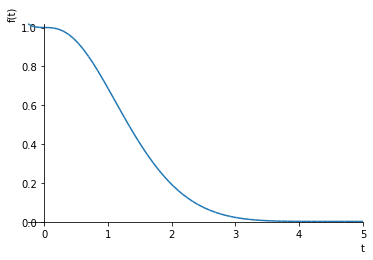

In [12]:
plot(lossy_norm(t),(t, -0.25, 5))

In [13]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [14]:
lossy_norm_n(2)

In [15]:
X = np.linspace(1e-6, 5.01, 500)  # avoid singularity in t=0

In [16]:
Y = lossy_norm_n(X)

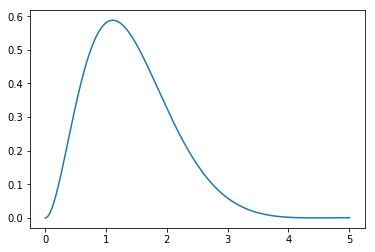

In [17]:
plt.plot(X, -np.gradient(Y, X))